In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
data = pd.read_excel('DryBeanDataSet.xlsx')

missing_values = data.eq("?").sum()
missing_values

data = data.replace('?', np.nan)

/var/folders/84/pgr0f22s293_z9t64z_cbfs00000gn/T/ipykernel_63388/2947397572.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('?', np.nan)


In [2]:
data['ShapeFactor1'] .describe()

for col in data.columns:
    print(col, len(data[col].unique()))

Area 12011
Perimeter 13351
MajorAxisLength 13543
MinorAxisLength 13543
AspectRation 13543
Eccentricity 13543
ConvexArea 12066
Constantness 2
EquivDiameter 12012
Colour 5
Extent 13530
Solidity 13526
roundness 13543
Compactness 13526
ShapeFactor1 13543
ShapeFactor2 13543
ShapeFactor3 13543
ShapeFactor4 13611
ShapeFactor5 13543
ShapeFactor6 13607
Class 8
Sort order 13611


### Data Types


In [3]:
data_types_table = pd.DataFrame(data.dtypes, columns=['Data Type'])
data_types_table.reset_index(inplace=True)
data_types_table.columns = ['Feature', 'Data Type']
# print(data_types_table)

unique_values = data.nunique()
# print(unique_values)
data['Sort order']

0        0.134791
1        0.898848
2        0.539684
3        0.149130
4        0.447635
           ...   
13606    0.764478
13607    0.679735
13608    0.946849
13609    0.046135
13610    0.912101
Name: Sort order, Length: 13611, dtype: float64

## Analysis of the object types
### Colour

In [4]:
print(data['Colour'].unique())
print(data['Colour'].value_counts())
print(f"missing values: {data['Colour'].isna().sum()}")


['brown' 'black' 'green' 'white' nan]
Colour
brown    6115
black    3541
green    2023
white    1926
Name: count, dtype: int64
missing values: 6


### Class

In [5]:
print(data['Class'].unique())
print(data['Class'].value_counts())
print(f"missing values: {data['Class'].isna().sum()}")

['CALI' 'DERMASON' 'SEKER' 'BOMBAY' 'SIRA' nan 'HOROZ' 'BARBUNYA']
Class
DERMASON    3542
SIRA        2634
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1317
BOMBAY       521
Name: count, dtype: int64
missing values: 17


### Constantness

In [6]:
print(data['Constantness'].unique())
print(data['Constantness'].value_counts())
print(f"missing values: {data['Constantness'].isna().sum()}")

[1 0]
Constantness
1    12289
0     1322
Name: count, dtype: int64
missing values: 0


## Analysis of Numerical data types

In [7]:
# data
# non_object_columns = data.select_dtypes(exclude=['object'])


# for column in non_object_columns:
#     # Summary statistics
#     summary_stats = data[column].describe()
#     print(summary_stats)

#     # Box plot
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x=data[column])
#     plt.title(f"Box Plot of {column}")
#     plt.xlabel(column)
#     plt.show()

## Continuous table

In [12]:
continuous_columns = data.drop('Constantness', axis=1).select_dtypes(include=['float64', 'int64']).columns
continuous_table = np.round(data[continuous_columns].describe().transpose(),4)

# Calculate percentage of missing values
continuous_table['Percentage of Missing Values'] = np.round((data[continuous_columns].isna().sum() / len(data)) * 100, 2)

# Calculate cardinality
continuous_table['Cardinality'] = data[continuous_columns].nunique()

continuous_table = continuous_table[['min', '25%', 'mean', '50%', '75%', 'max', 'std', 'count', 'Percentage of Missing Values', 'Cardinality']]
continuous_table.columns = ['Minimum', 'First Quartile', 'Mean', 'Median', 'Third Quartile', 'Maximum', 'Standard Deviation', 'Number of Instances', 'Percentage of Missing Values', 'Cardinality']

print(continuous_table.to_latex())
continuous_table

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & Minimum & First Quartile & Mean & Median & Third Quartile & Maximum & Standard Deviation & Number of Instances & Percentage of Missing Values & Cardinality \\
\midrule
Area & 20420.000000 & 36328.000000 & 53048.284500 & 44652.000000 & 61332.000000 & 254616.000000 & 29324.095700 & 13611.000000 & 0.000000 & 12011 \\
Perimeter & 524.736000 & 703.523500 & 855.283500 & 794.941000 & 977.213000 & 1985.370000 & 214.289700 & 13611.000000 & 0.000000 & 13351 \\
MajorAxisLength & 183.601200 & 253.303600 & 320.141900 & 296.883400 & 376.495000 & 738.860200 & 85.694200 & 13611.000000 & 0.000000 & 13543 \\
MinorAxisLength & 122.512700 & 175.848200 & 202.270700 & 192.431700 & 217.031700 & 460.198500 & 44.970100 & 13611.000000 & 0.000000 & 13543 \\
AspectRation & 1.024900 & 1.432300 & 1.583200 & 1.551100 & 1.707100 & 2.430300 & 0.246700 & 13611.000000 & 0.000000 & 13543 \\
Eccentricity & 0.219000 & 0.715900 & 0.750900 & 0.764400 & 0.810500 & 0.911400 & 0.092000 &

,Minimum,First Quartile,Mean,Median,Third Quartile,Maximum,Standard Deviation,Number of Instances,Percentage of Missing Values,Cardinality
Area,20420.0000,36328.0000,53048.2845,44652.0000,61332.0000,2.546160e+05,29324.0957,13611.0,0.00,12011
Perimeter,524.7360,703.5235,855.2835,794.9410,977.2130,1.985370e+03,214.2897,13611.0,0.00,13351
MajorAxisLength,183.6012,253.3036,320.1419,296.8834,376.4950,7.388602e+02,85.6942,13611.0,0.00,13543
MinorAxisLength,122.5127,175.8482,202.2707,192.4317,217.0317,4.601985e+02,44.9701,13611.0,0.00,13543
AspectRation,1.0249,1.4323,1.5832,1.5511,1.7071,2.430300e+00,0.2467,13611.0,0.00,13543
Eccentricity,0.2190,0.7159,0.7509,0.7644,0.8105,9.114000e-01,0.0920,13611.0,0.00,13543
ConvexArea,-30.0000,36714.5000,53765.6926,45178.0000,62294.0000,2.632610e+05,29778.0094,13611.0,0.00,12066
EquivDiameter,0.1614,215.0680,476.2541,238.4380,279.4522,3.014441e+06,25836.8656,13611.0,0.00,12012
Extent,0.5553,0.7186,0.7497,0.7599,0.7869,8.662000e-01,0.0491,13605.0,0.04,13529
Solidity,0.9192,0.9857,0.9871,0.9883,0.9900,9.947000e-01,0.0047,13611.0,0.00,13526


## Categorical table

In [19]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)
categorical_columns = categorical_columns.append(pd.Index(['Constantness']))
categorical_table = pd.DataFrame(columns=['Variable', 'Count', 'Missing Values %', 'Cardinality', 'Mode', 'Mode Frequency', 'Mode %', '2nd Mode', '2nd Mode Frequency', '2nd Mode %'])
i=0
for column in categorical_columns:
    i = i + 1
    count = data[column].count()
    missing_values_percentage = (data[column].isna().sum() / len(data)) * 100
    cardinality = data[column].nunique()
    mode = data[column].mode().values[0]
    mode_frequency = data[column].value_counts().iloc[0]
    mode_percentage = (mode_frequency / count) * 100
    second_mode = data[column].value_counts().index[1]
    second_mode_frequency = data[column].value_counts().iloc[1]
    second_mode_percentage = (second_mode_frequency / count) * 100
    
    new_row = pd.DataFrame({
        'Variable': [column],
        'Count': [count],
        'Missing Values %': [missing_values_percentage],
        'Cardinality': [cardinality],
        'Mode': [mode],
        'Mode Frequency': [mode_frequency],
        'Mode %': [mode_percentage],
        '2nd Mode': [second_mode],
        '2nd Mode Frequency': [second_mode_frequency],
        '2nd Mode %': [second_mode_percentage]
    })
    
    categorical_table = pd.concat([categorical_table, new_row], ignore_index=True)
categorical_table.set_index('Variable', inplace=True)

print(categorical_table.to_latex())
categorical_table

Index(['Colour', 'Class'], dtype='object')
\begin{tabular}{llrlllrllr}
\toprule
 & Count & Missing Values % & Cardinality & Mode & Mode Frequency & Mode % & 2nd Mode & 2nd Mode Frequency & 2nd Mode % \\
Variable &  &  &  &  &  &  &  &  &  \\
\midrule
Colour & 13605 & 0.044082 & 4 & brown & 6115 & 44.946711 & black & 3541 & 26.027196 \\
Class & 13594 & 0.124899 & 7 & DERMASON & 3542 & 26.055613 & SIRA & 2634 & 19.376195 \\
Constantness & 13611 & 0.000000 & 2 & 1 & 12289 & 90.287268 & 0 & 1322 & 9.712732 \\
\bottomrule
\end{tabular}



/var/folders/84/pgr0f22s293_z9t64z_cbfs00000gn/T/ipykernel_19887/4217319506.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  categorical_table = pd.concat([categorical_table, new_row], ignore_index=True)


,Count,Missing Values %,Cardinality,Mode,Mode Frequency,Mode %,2nd Mode,2nd Mode Frequency,2nd Mode %
Variable,,,,,,,,,
Colour,13605,0.044082,4,brown,6115,44.946711,black,3541,26.027196
Class,13594,0.124899,7,DERMASON,3542,26.055613,SIRA,2634,19.376195
Constantness,13611,0.000000,2,1,12289,90.287268,0,1322,9.712732


\begin{sidewaystable}[htbp]
\centering
\caption{Statistical Summary of Various Measurements and Categorical Variables}
\small
\setlength{\tabcolsep}{4pt}
\begin{tabularx}{\textwidth}{@{}l*{10}{>{\raggedleft\arraybackslash}X}@{}}
\multicolumn{11}{@{}l@{}}{\textbf{(a) Continuous Variables}} \\
\toprule
\textbf{Feature} & \textbf{Minimum} & \textbf{First Quartile} & \textbf{Mean} & \textbf{Median} & \textbf{Third Quartile} & \textbf{Maximum} & \textbf{Standard Deviation} & \textbf{Number of Instances} & \textbf{Missing Values \%} & \textbf{Cardinality} \\
\midrule
Area & 20420.00 & 36328.00 & 53048.28 & 44652.00 & 61332.00 & 254616.00 & 29324.10 & 13611.00 & 0.0 & 12011 \\
Perimeter & 524.74 & 703.52 & 855.28 & 794.94 & 977.21 & 1985.37 & 214.29 & 13611.00 & 0.0 & 13351 \\
MajorAxisLength & 183.60 & 253.30 & 320.14 & 296.88 & 376.50 & 738.86 & 85.69 & 13611.00 & 0.0 & 13543 \\
MinorAxisLength & 122.51 & 175.85 & 202.27 & 192.43 & 217.03 & 460.20 & 44.97 & 13611.00 & 0.0 & 13543 \\
AspectRation & 1.02 & 1.43 & 1.58 & 1.55 & 1.71 & 2.43 & 0.25 & 13611.00 & 0.0 & 13543 \\
Eccentricity & 0.22 & 0.72 & 0.75 & 0.76 & 0.81 & 0.91 & 0.09 & 13611.00 & 0.0 & 13543 \\
ConvexArea & -30.00 & 36714.50 & 53765.69 & 45178.00 & 62294.00 & 263261.00 & 29778.01 & 13611.00 & 0.0 & 12066 \\
EquivDiameter & 0.16 & 215.07 & 476.25 & 238.44 & 279.45 & 3014441.24 & 25836.87 & 13611.00 & 0.0 & 12012 \\
Extent & 0.56 & 0.72 & 0.75 & 0.76 & 0.79 & 0.87 & 0.05 & 13605.00 & 0.4 & 13529 \\
Solidity & 0.92 & 0.99 & 0.99 & 0.99 & 0.99 & 0.99 & 0.00 & 13611.00 & 0.0 & 13526 \\
roundness & 0.49 & 0.83 & 0.87 & 0.88 & 0.92 & 0.99 & 0.06 & 13611.00 & 0.0 & 13543 \\
Compactness & 0.64 & 0.76 & 0.80 & 0.80 & 0.83 & 0.99 & 0.06 & 13593.00 & 1.3 & 13525 \\
ShapeFactor1 & 0.00 & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 & 0.00 & 13611.00 & 0.0 & 13543 \\
ShapeFactor2 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 13611.00 & 0.0 & 13543 \\
ShapeFactor3 & 0.41 & 0.58 & 0.64 & 0.64 & 0.70 & 0.97 & 0.10 & 13611.00 & 0.0 & 13543 \\
ShapeFactor4 & 0.70 & 1.61 & 2.37 & 2.37 & 3.12 & 3.97 & 0.87 & 13611.00 & 0.0 & 13611 \\
ShapeFactor5 & 0.95 & 0.99 & 1.00 & 1.00 & 1.00 & 1.00 & 0.00 & 13611.00 & 0.0 & 13543 \\
ShapeFactor6 & 0.00 & 45.26 & 89.36 & 88.77 & 134.27 & 178.99 & 51.84 & 13606.00 & 0.04 & 13606 \\
Sort order & 0.00 & 0.25 & 0.50 & 0.50 & 0.75 & 1.00 & 0.29 & 13611.00 & 0.00 & 13611 \\
\midrule
\multicolumn{11}{@{}l@{}}{\textbf{(b) Categorical Variables}} \\
\midrule
\textbf{Feature} & \textbf{Count} & \textbf{Missing Values \%} & \textbf{Cardinality} & \textbf{Mode} & \textbf{Mode Frequency} & \textbf{Mode \%} & \textbf{2nd Mode} & \textbf{2nd Mode Frequency} & \textbf{2nd Mode \%} & \\
\cmidrule{1-10}
Colour & 13605 & 0.04 & 4 & brown & 6115 & 44.95 & black & 3541 & 26.03 & \\
Class & 13594 & 0.12 & 7 & DERMASON & 3542 & 26.06 & SIRA & 2634 & 19.38 & \\
\bottomrule
\end{tabularx}
\end{sidewaystable}

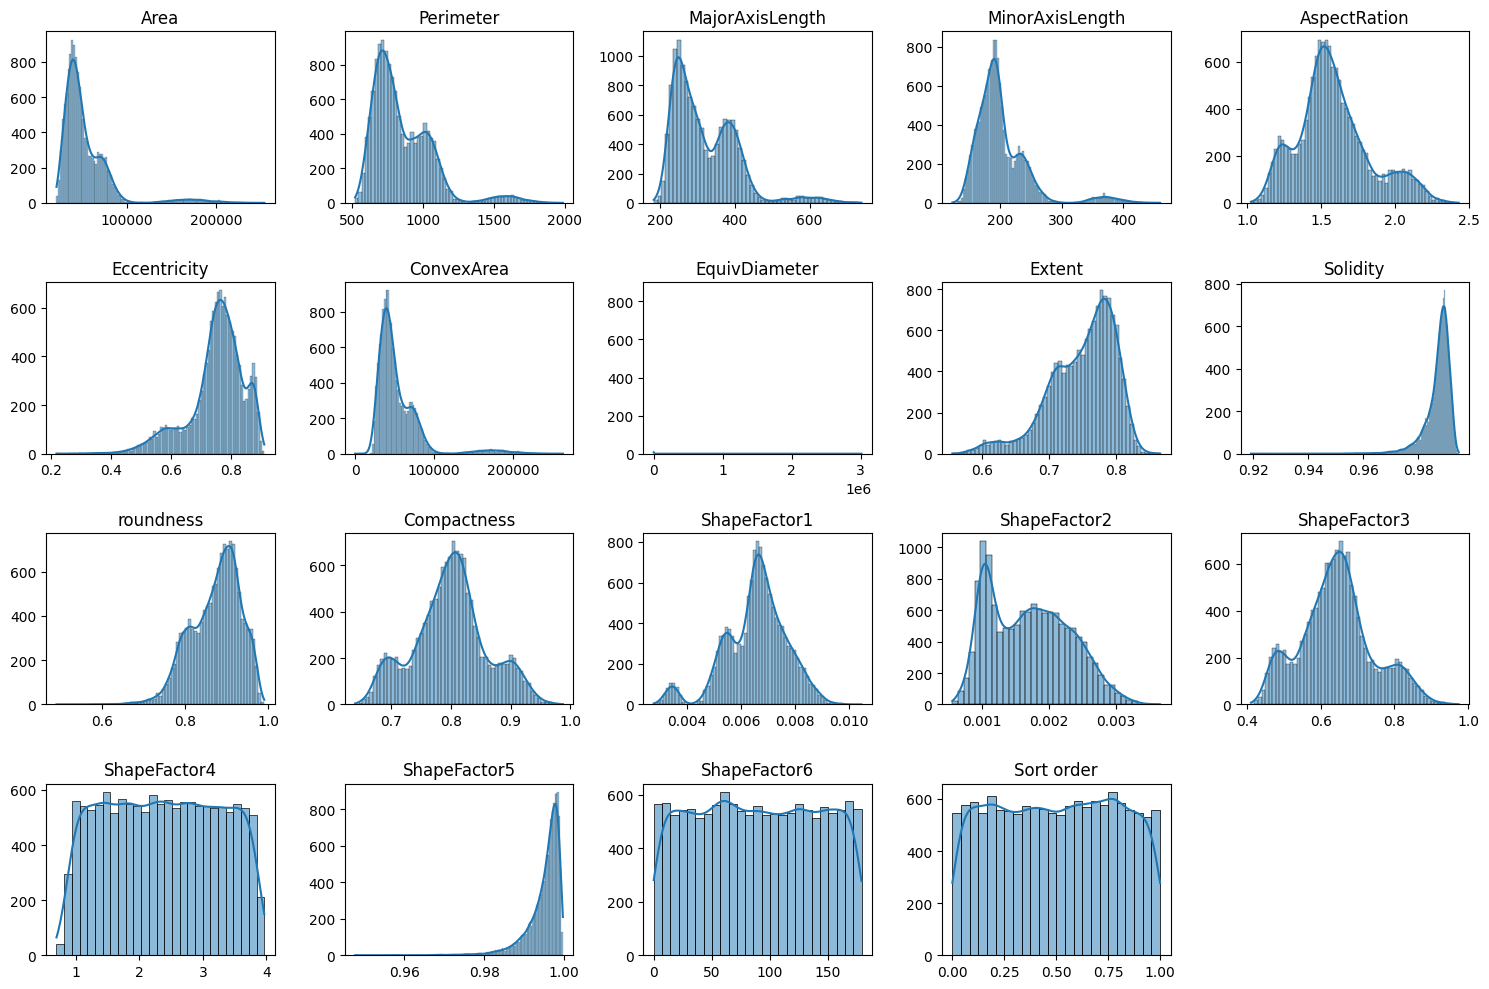

In [20]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 10))

# Create subplots for continuous variables
for i, column in enumerate(continuous_columns):
    plt.subplot(4, 5, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

# # Create subplots for categorical variables
# for i, column in enumerate(categorical_columns):
#     plt.subplot(4, 5, i+1+len(categorical_columns))
#     sns.countplot(data[column])
#     plt.title(column)
#     plt.xlabel('')
#     plt.ylabel('')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

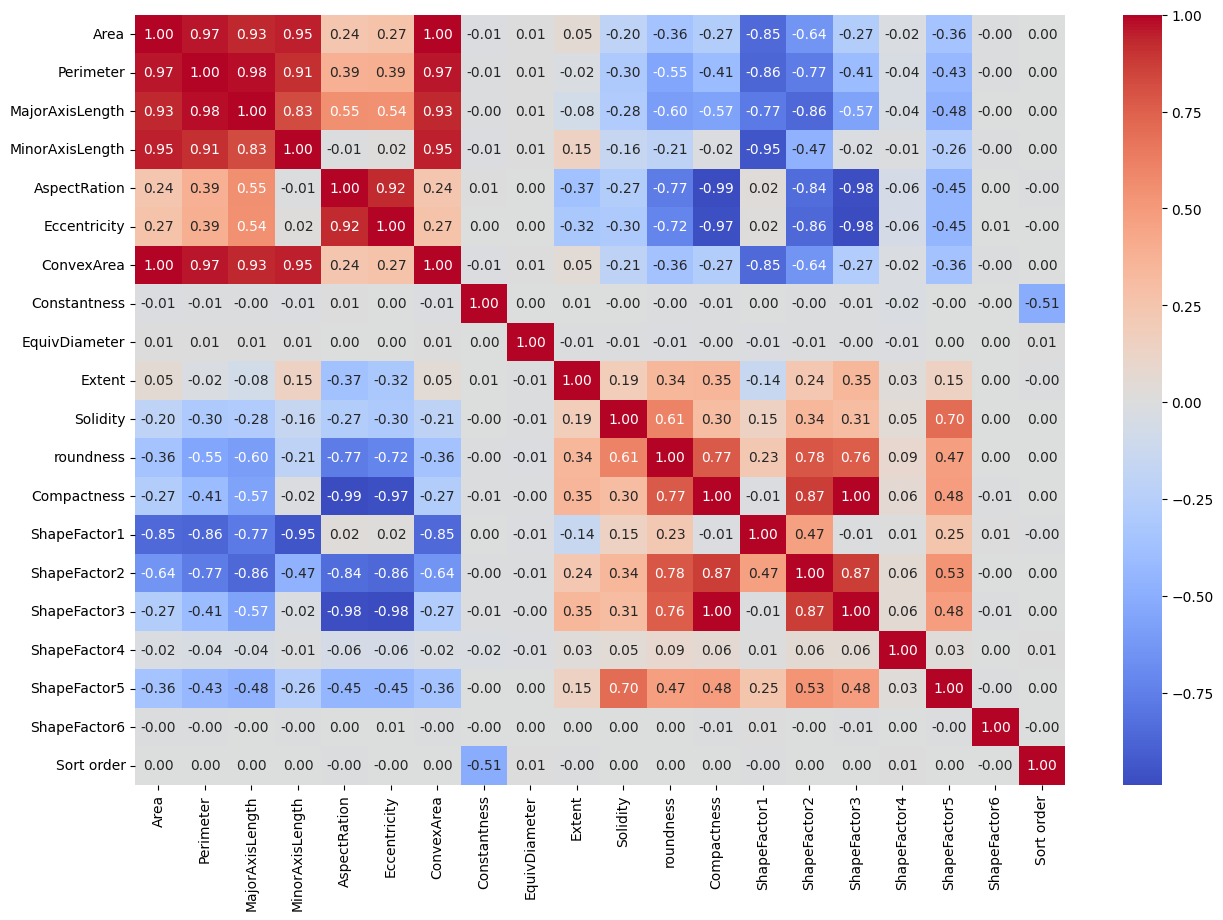

In [10]:
# draw heatmap of the correlations of each feature with each other

# drop categorical features
data = data.drop(['Class', 'Colour',], axis=1)
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

